Example used in CMU DESC Fall 2023 Tutorial </br>
Updates for ccl>=3.3.0

In [2]:
# Auxiliary import and Functions
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams.update({"figure.dpi":120})

# you can edit with you own path if necessary:
import sys
sys.path.append("/home/faoli/programs/lsst/2023cmu/TJPCov/")


def cov2corr(cov):
    """
    Convert a covariance matrix into a correlation matrix
    input:
        cov: numpy.array with dim:(N,N)
    returns:
        corr: numpy.array with dim:(N,N)
    """
    sig = np.sqrt(cov.diagonal())
    return cov/np.outer(sig, sig)

## Input file:
check the appendix of this notebook for the contents of .yaml file

In [3]:
homepath = '/home/faoli/programs/lsst/2023cmu/TJPCov/' # Edit with your TJPCov path. e.g.: '/home/faoli/programs/lsst/TJPCov/'
%cd {homepath}
config_yml = f"{homepath}/tests/data/conf_covariance_gaussian_fsky_fourier.yaml"

/home/faoli/programs/lsst/2023cmu/TJPCov


## Using TJPCov Gaussian Fsky

1. Import and create the object:

In [4]:
# This is a sanity check that we are using ccl 3.0.0
# Not necessary for your regular run
import pyccl; print(pyccl.__version__)

3.0.0


In [5]:
from tjpcov.covariance_calculator import CovarianceCalculator
cc = CovarianceCalculator(config_yml)
cc.config

{'tjpcov': {'sacc_file': 'examples/old_api/des_y1_3x2pt/generic_cl_des_y1_3x2pt_sacc_data.fits',
  'cosmo': 'tests/data/cosmo_desy1.yaml',
  'cov_type': ['FourierGaussianFsky'],
  'Ngal_lens0': 26,
  'Ngal_lens1': 26,
  'Ngal_lens2': 26,
  'Ngal_lens3': 26,
  'Ngal_lens4': 26,
  'Ngal_src0': 26,
  'Ngal_src1': 26,
  'Ngal_src2': 26,
  'Ngal_src3': 26,
  'sigma_e_src0': 0.26,
  'sigma_e_src1': 0.26,
  'sigma_e_src2': 0.26,
  'sigma_e_src3': 0.26,
  'bias_lens0': 1.5,
  'bias_lens1': 1.5,
  'bias_lens2': 1.5,
  'bias_lens3': 1.5,
  'bias_lens4': 1.5,
  'IA': 0.5},
 'GaussianFsky': {'fsky': 0.3}}

2. Get your covariance (This should not take a long time)

In [6]:
%%time 
cov = cc.get_covariance()

Computing independent covariance blocks
Rank None: ('lens0', 'lens0'), ('lens0', 'lens0')


/home/faoli/anaconda3/lib/python3.8/site-packages/sacc/sacc.py:378: UserWarning: Empty index selected - maybe you should check the tracer order?
  warnings.warn("Empty index selected - maybe you "
/home/faoli/programs/lsst/2023cmu/TJPCov/tjpcov/covariance_builder.py:887: UserWarning: Missing n_ell_coupled info for some tracers in the sacc file. You will have to pass it withthe cache
  warnings.warn(


Rank None: ('lens0', 'lens0'), ('lens1', 'lens1')
Rank None: ('lens0', 'lens0'), ('lens2', 'lens2')
Rank None: ('lens0', 'lens0'), ('lens3', 'lens3')
Rank None: ('lens0', 'lens0'), ('lens4', 'lens4')
Rank None: ('lens0', 'lens0'), ('lens0', 'src0')
Rank None: ('lens0', 'lens0'), ('lens0', 'src1')
Rank None: ('lens0', 'lens0'), ('lens0', 'src2')
Rank None: ('lens0', 'lens0'), ('lens0', 'src3')
Rank None: ('lens0', 'lens0'), ('lens1', 'src0')
Rank None: ('lens0', 'lens0'), ('lens1', 'src1')
Rank None: ('lens0', 'lens0'), ('lens1', 'src2')
Rank None: ('lens0', 'lens0'), ('lens1', 'src3')
Rank None: ('lens0', 'lens0'), ('lens2', 'src0')
Rank None: ('lens0', 'lens0'), ('lens2', 'src1')
Rank None: ('lens0', 'lens0'), ('lens2', 'src2')
Rank None: ('lens0', 'lens0'), ('lens2', 'src3')
Rank None: ('lens0', 'lens0'), ('lens3', 'src0')
Rank None: ('lens0', 'lens0'), ('lens3', 'src1')
Rank None: ('lens0', 'lens0'), ('lens3', 'src2')
Rank None: ('lens0', 'lens0'), ('lens3', 'src3')
Rank None: ('len

Rank None: ('lens0', 'src0'), ('lens1', 'src1')
Rank None: ('lens0', 'src0'), ('lens1', 'src2')
Rank None: ('lens0', 'src0'), ('lens1', 'src3')
Rank None: ('lens0', 'src0'), ('lens2', 'src0')
Rank None: ('lens0', 'src0'), ('lens2', 'src1')
Rank None: ('lens0', 'src0'), ('lens2', 'src2')
Rank None: ('lens0', 'src0'), ('lens2', 'src3')
Rank None: ('lens0', 'src0'), ('lens3', 'src0')
Rank None: ('lens0', 'src0'), ('lens3', 'src1')
Rank None: ('lens0', 'src0'), ('lens3', 'src2')
Rank None: ('lens0', 'src0'), ('lens3', 'src3')
Rank None: ('lens0', 'src0'), ('lens4', 'src0')
Rank None: ('lens0', 'src0'), ('lens4', 'src1')
Rank None: ('lens0', 'src0'), ('lens4', 'src2')
Rank None: ('lens0', 'src0'), ('lens4', 'src3')
Rank None: ('lens0', 'src0'), ('src0', 'src0')
Rank None: ('lens0', 'src0'), ('src0', 'src1')
Rank None: ('lens0', 'src0'), ('src0', 'src2')
Rank None: ('lens0', 'src0'), ('src0', 'src3')
Rank None: ('lens0', 'src0'), ('src1', 'src1')
Rank None: ('lens0', 'src0'), ('src1', 'src2'

Rank None: ('lens1', 'src2'), ('lens4', 'src2')
Rank None: ('lens1', 'src2'), ('lens4', 'src3')
Rank None: ('lens1', 'src2'), ('src0', 'src0')
Rank None: ('lens1', 'src2'), ('src0', 'src1')
Rank None: ('lens1', 'src2'), ('src0', 'src2')
Rank None: ('lens1', 'src2'), ('src0', 'src3')
Rank None: ('lens1', 'src2'), ('src1', 'src1')
Rank None: ('lens1', 'src2'), ('src1', 'src2')
Rank None: ('lens1', 'src2'), ('src1', 'src3')
Rank None: ('lens1', 'src2'), ('src2', 'src2')
Rank None: ('lens1', 'src2'), ('src2', 'src3')
Rank None: ('lens1', 'src2'), ('src3', 'src3')
Rank None: ('lens1', 'src3'), ('lens1', 'src3')
Rank None: ('lens1', 'src3'), ('lens2', 'src0')
Rank None: ('lens1', 'src3'), ('lens2', 'src1')
Rank None: ('lens1', 'src3'), ('lens2', 'src2')
Rank None: ('lens1', 'src3'), ('lens2', 'src3')
Rank None: ('lens1', 'src3'), ('lens3', 'src0')
Rank None: ('lens1', 'src3'), ('lens3', 'src1')
Rank None: ('lens1', 'src3'), ('lens3', 'src2')
Rank None: ('lens1', 'src3'), ('lens3', 'src3')
Ra

Rank None: ('lens3', 'src3'), ('src0', 'src0')
Rank None: ('lens3', 'src3'), ('src0', 'src1')
Rank None: ('lens3', 'src3'), ('src0', 'src2')
Rank None: ('lens3', 'src3'), ('src0', 'src3')
Rank None: ('lens3', 'src3'), ('src1', 'src1')
Rank None: ('lens3', 'src3'), ('src1', 'src2')
Rank None: ('lens3', 'src3'), ('src1', 'src3')
Rank None: ('lens3', 'src3'), ('src2', 'src2')
Rank None: ('lens3', 'src3'), ('src2', 'src3')
Rank None: ('lens3', 'src3'), ('src3', 'src3')
Rank None: ('lens4', 'src0'), ('lens4', 'src0')
Rank None: ('lens4', 'src0'), ('lens4', 'src1')
Rank None: ('lens4', 'src0'), ('lens4', 'src2')
Rank None: ('lens4', 'src0'), ('lens4', 'src3')
Rank None: ('lens4', 'src0'), ('src0', 'src0')
Rank None: ('lens4', 'src0'), ('src0', 'src1')
Rank None: ('lens4', 'src0'), ('src0', 'src2')
Rank None: ('lens4', 'src0'), ('src0', 'src3')
Rank None: ('lens4', 'src0'), ('src1', 'src1')
Rank None: ('lens4', 'src0'), ('src1', 'src2')
Rank None: ('lens4', 'src0'), ('src1', 'src3')
Rank None

('lens2', 'lens2') ('lens1', 'src0')
('lens2', 'lens2') ('lens1', 'src1')
('lens2', 'lens2') ('lens1', 'src2')
('lens2', 'lens2') ('lens1', 'src3')
('lens2', 'lens2') ('lens2', 'src0')
('lens2', 'lens2') ('lens2', 'src1')
('lens2', 'lens2') ('lens2', 'src2')
('lens2', 'lens2') ('lens2', 'src3')
('lens2', 'lens2') ('lens3', 'src0')
('lens2', 'lens2') ('lens3', 'src1')
('lens2', 'lens2') ('lens3', 'src2')
('lens2', 'lens2') ('lens3', 'src3')
('lens2', 'lens2') ('lens4', 'src0')
('lens2', 'lens2') ('lens4', 'src1')
('lens2', 'lens2') ('lens4', 'src2')
('lens2', 'lens2') ('lens4', 'src3')
('lens2', 'lens2') ('src0', 'src0')
('lens2', 'lens2') ('src0', 'src1')
('lens2', 'lens2') ('src0', 'src2')
('lens2', 'lens2') ('src0', 'src3')
('lens2', 'lens2') ('src1', 'src1')
('lens2', 'lens2') ('src1', 'src2')
('lens2', 'lens2') ('src1', 'src3')
('lens2', 'lens2') ('src2', 'src2')
('lens2', 'lens2') ('src2', 'src3')
('lens2', 'lens2') ('src3', 'src3')
('lens3', 'lens3') ('lens3', 'lens3')
('lens3', 

('lens1', 'src0') ('src3', 'src3')
('lens1', 'src1') ('lens1', 'src1')
('lens1', 'src1') ('lens1', 'src2')
('lens1', 'src1') ('lens1', 'src3')
('lens1', 'src1') ('lens2', 'src0')
('lens1', 'src1') ('lens2', 'src1')
('lens1', 'src1') ('lens2', 'src2')
('lens1', 'src1') ('lens2', 'src3')
('lens1', 'src1') ('lens3', 'src0')
('lens1', 'src1') ('lens3', 'src1')
('lens1', 'src1') ('lens3', 'src2')
('lens1', 'src1') ('lens3', 'src3')
('lens1', 'src1') ('lens4', 'src0')
('lens1', 'src1') ('lens4', 'src1')
('lens1', 'src1') ('lens4', 'src2')
('lens1', 'src1') ('lens4', 'src3')
('lens1', 'src1') ('src0', 'src0')
('lens1', 'src1') ('src0', 'src1')
('lens1', 'src1') ('src0', 'src2')
('lens1', 'src1') ('src0', 'src3')
('lens1', 'src1') ('src1', 'src1')
('lens1', 'src1') ('src1', 'src2')
('lens1', 'src1') ('src1', 'src3')
('lens1', 'src1') ('src2', 'src2')
('lens1', 'src1') ('src2', 'src3')
('lens1', 'src1') ('src3', 'src3')
('lens1', 'src2') ('lens1', 'src2')
('lens1', 'src2') ('lens1', 'src3')
('l

('lens4', 'src0') ('src1', 'src3')
('lens4', 'src0') ('src2', 'src2')
('lens4', 'src0') ('src2', 'src3')
('lens4', 'src0') ('src3', 'src3')
('lens4', 'src1') ('lens4', 'src1')
('lens4', 'src1') ('lens4', 'src2')
('lens4', 'src1') ('lens4', 'src3')
('lens4', 'src1') ('src0', 'src0')
('lens4', 'src1') ('src0', 'src1')
('lens4', 'src1') ('src0', 'src2')
('lens4', 'src1') ('src0', 'src3')
('lens4', 'src1') ('src1', 'src1')
('lens4', 'src1') ('src1', 'src2')
('lens4', 'src1') ('src1', 'src3')
('lens4', 'src1') ('src2', 'src2')
('lens4', 'src1') ('src2', 'src3')
('lens4', 'src1') ('src3', 'src3')
('lens4', 'src2') ('lens4', 'src2')
('lens4', 'src2') ('lens4', 'src3')
('lens4', 'src2') ('src0', 'src0')
('lens4', 'src2') ('src0', 'src1')
('lens4', 'src2') ('src0', 'src2')
('lens4', 'src2') ('src0', 'src3')
('lens4', 'src2') ('src1', 'src1')
('lens4', 'src2') ('src1', 'src2')
('lens4', 'src2') ('src1', 'src3')
('lens4', 'src2') ('src2', 'src2')
('lens4', 'src2') ('src2', 'src3')
('lens4', 'src2

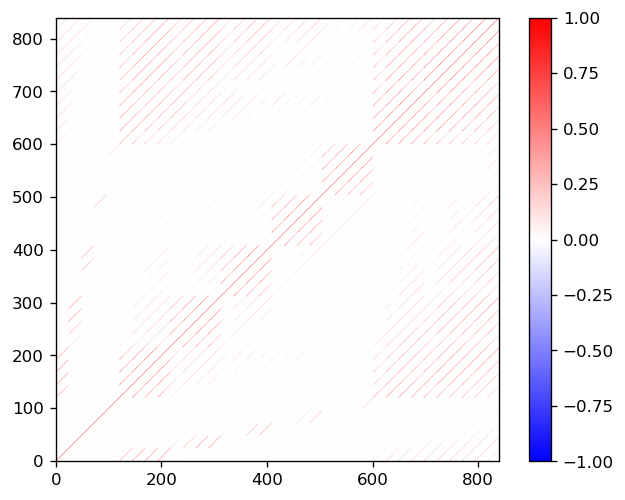

In [7]:
corr = cov2corr(cov)
plt.imshow(corr, origin='lower', vmin=-1, vmax=1, cmap='bwr')
plt.colorbar()

## Appendix A: config file content
Important fields in the configuration file: 

```yaml
tjpcov:

  ### This is the place to store your n(z) 
  sacc_file: examples/old_api/des_y1_3x2pt/generic_cl_des_y1_3x2pt_sacc_data.fits
    
  ### The **cosmology** is from the ccl cosmo object!
  cosmo: tests/data/cosmo_desy1.yaml
  
  # Now, tell TJPCov which kind of covariance you want.
  #   The logic of name is [Space_kind][CovarianceTerm][Options] (case sensitive!) 
  #   as in the example below
  cov_type: [FourierGaussianFsky]

  ### Survey params:
  ### a. 5 lens bins ( in arcmin^2)
  {% for i in range(5) %} 
  Ngal_lens{{ i }}: {{26}} # arc_min^2
  {% endfor %}

  ### b. 4 source bins
  {% for i in range(4) %} 
  Ngal_src{{ i }}: {{26}} # arc_min^2
  {% endfor %}

  ### constant bin sigma_e
  {% for i in range(4) %} 
  sigma_e_src{{ i }}: {{ 0.26 }}
  {% endfor %}

  ### linear bias for lenses constant for redshift bin (example notebook)
  {% for i, val in [(0, 1.5), (1, 1.5), (2, 1.5), (3, 1.5), (4, 1.5)] %}
  bias_lens{{ i }}: {{ val }}
  {% endfor %}

  IA: 0.5

### This is the fraction of sky in your footprint (default=1)
#       This is ignored by NaMaster case
GaussianFsky:
  fsky: 0.3
```

## Appendix B. Looking the sacc/fits file
Since TJPCov uses ccl for integrate its power spectra, the n(z) are passed through sacc files.

In [10]:
from astropy.io import fits

ft = fits.open(f"{homepath}/examples/old_api/des_y1_3x2pt/generic_cl_des_y1_3x2pt_sacc_data.fits")

[(0.0, 2.3), (0.0, 2.3)]

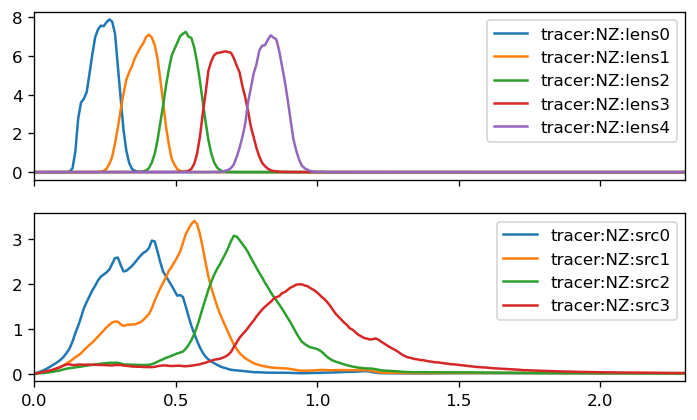

In [11]:
f, ax = plt.subplots(2,1, figsize=(7,4), sharex=True)

for trc in [f"tracer:NZ:lens{i}" for i in range(5)]:
    ax[0].plot(ft[trc].data['z'], ft[trc].data['nz'], label=trc)
    
for trc in [f"tracer:NZ:src{i}" for i in range(4)]:
    ax[1].plot(ft[trc].data['z'], ft[trc].data['nz'], label=trc)
    
ax[0].legend(loc='best')
ax[1].legend(loc='best')
[axi.set_xlim(0,2.3) for axi in ax]